In [19]:
!pip install opencv-python

# Problem Statement

- Build a classifier model that can **reliably and accurately detect cracks** in typical concrete surfaces.
- Cracks in  concrete are one of the most common defects, and has in the past required manual inspection.
- Areas where it is inaccessble/hard to access for humans can instead use crack recognition and classification technology.

# Executive summary

**Data pre-processing**
- Image dataset taken from https://data.mendeley.com/datasets/5y9wdsg2zt/2
- Dataset contains 40,000 images, split equally between Class 0 (no cracks) and Class 1 (cracks)
- Dataset was shuffled and split into train and test set, then saved as hp5y files


**Model construction**
- Initially, a CNN model was constructed. The initial CNN model performed badly. The 2nd one performed significantly better with tuned hyperparemeters. It was deemed a validation accuracy of ~0.98 was good enough.
- It was realized that the CNN model performed badly on thin and narrow cracks.
- The image data was pre-processed using Fast Fourier Transform (FFT) and azimuthal averaging to reduce data dimensionality, so that machine learning classification models could be constructed.
- Generally, there were 2 scenarios which commonly resulted in misclassification:
    - Surfaces with many small craters led to models misclassifying the image as Class 1
    - Surfaces with very thin and narrow cracks led to models misclassifying the image as Class 0
    
**Model prediction on unseen data**
- It was found that in general the machine learning models were better at detecting thin and narrow cracks as compared to the CNN model.
- A meta classifier (voting classifier) model was constructed to increase reliability in detecting small cracks
    - Pockmarked surfaces were still a problem, however this was deemed more desirable than unreliable detection of small cracks (i.e. higher recall was more desirable compared to specificity)

# Data pre-processing

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import h5py
import random
import cv2

random.seed(55)

- Dataset of concrete crack images obtained from https://data.mendeley.com/datasets/5y9wdsg2zt/2
- Dataset includes 20000 images of cracked concrete surfaces and 20000 images of un-cracked surfaces

In [2]:
# Read in first img of Positive (cracked) dataset as grayscale
im = cv2.imread('../dataset/Positive/00001.jpg', cv2.IMREAD_GRAYSCALE)

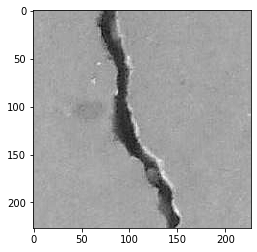

In [4]:
# Display the img
plt.imshow(im, cmap='gray')

In [24]:
# Generate a list of lists of the image array data, along with the img label
data = []
labels = ['Negative', 'Positive']
for label in labels:
    label_num = labels.index(label)
    for img in os.listdir(f'../dataset/{label}/'):
        img_array = cv2.imread(f'../dataset/{label}/{img}', cv2.IMREAD_GRAYSCALE)
        data.append([img_array, label_num])
    

In [26]:
# Shuffle the data
random.shuffle(data)

In [27]:
# Split data into train and test set
train = data[0:int(len(data)*0.75)]
test = data[int((len(data)*0.75)): ]

In [28]:
# Check len of train and test
print(len(train))
print(len(test))

30000
10000


In [51]:
# Create X_train & y_train
X_train = []
y_train = []
for data, label in train:
    X_train.append(data)
    y_train.append(label)

In [52]:
# Create X_test & y_test
X_test = []
y_test = []
for data, label in test:
    X_test.append(data)
    y_test.append(label)

In [53]:
# Reshape img 
X_train = np.array(X_train).reshape(len(train), 227, 227, 1)
X_test = np.array(X_test).reshape(len(test), 227, 227, 1)

In [54]:
# Check shape of X_train
np.array(X_train).shape

(30000, 227, 227, 1)

In [55]:
# Check shape of y_train
np.array(y_train).shape

(30000,)

In [56]:
# Check shape of X_test and y_test
print(np.array(X_test).shape)
print(np.array(y_test).shape)

(10000, 227, 227, 1)
(10000,)


In [57]:
# Scale train data
X_train = X_train / 255

In [58]:
# Scale test data
X_test = X_test / 255

In [3]:
# Generate a list of lists of the image array data, along with the img label
data = []
labels = ['Negative', 'Positive']
for label in labels:
    label_num = labels.index(label)
    for img in os.listdir(f'../dataset/{label}/'):
        img_array = cv2.imread(f'../dataset/{label}/{img}', cv2.IMREAD_GRAYSCALE)
        data.append([img_array, label_num])
    

In [4]:
# Shuffle the data
random.shuffle(data)

In [5]:
# Split data into train and test set
train = data[0:int(len(data)*0.75)]
test = data[int((len(data)*0.75)): ]

In [6]:
X_train = []
y_train = []
for data, label in train:
    X_train.append(data)
    y_train.append(label)

In [7]:
X_test = []
y_test = []
for data, label in test:
    X_test.append(data)
    y_test.append(label)

In [60]:
# Save train set as h5py file, a more efficient file format for large arrays
hf = h5py.File('../dataset/train.h5', 'w')
hf.create_dataset('X_train', data=X_train, compression='gzip')
hf.create_dataset('y_train', data=y_train, compression='gzip')
hf.close()
print('Train data saved successfully')

Train data saved successfully


In [61]:
# Save test set
hf = h5py.File('../dataset/test.h5', 'w')
hf.create_dataset('X_test', data=X_test, compression='gzip')
hf.create_dataset('y_test', data=y_test, compression='gzip')
hf.close()
print('Test data saved successfully')

Test data saved successfully


- **End of Data Preprocessing notebook**
- **Project continues in Modelling Construction Notebook**